In [ ]:
!pip install scikit-learn==1.1.1 -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
%matplotlib inline
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

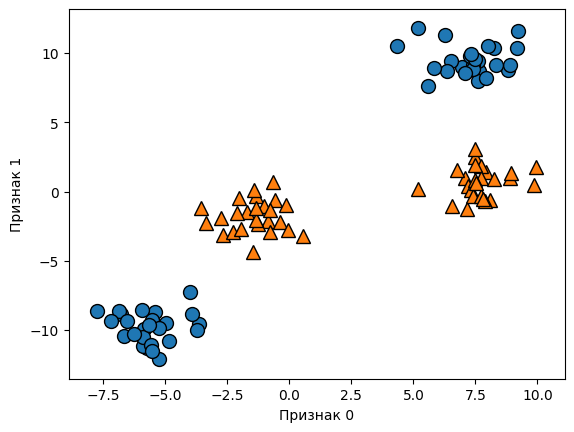

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8) 
y = y % 2 
 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Признак 0") 
plt.ylabel("Признак 1");
# Набор данных с двухклассовой классификацией, в котором классы линейно неразделимы

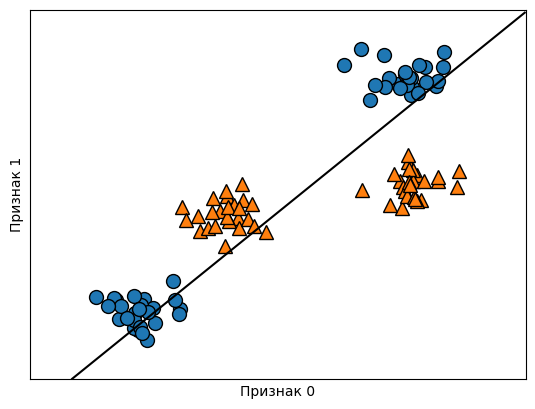

In [ ]:
from sklearn.svm import LinearSVC 
linear_svm = LinearSVC().fit(X, y) 
 
mglearn.plots.plot_2d_separator(linear_svm, X) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Признак 0") 
plt.ylabel("Признак 1");
# Граница принятия решений, найденная с помощью линейного SVM

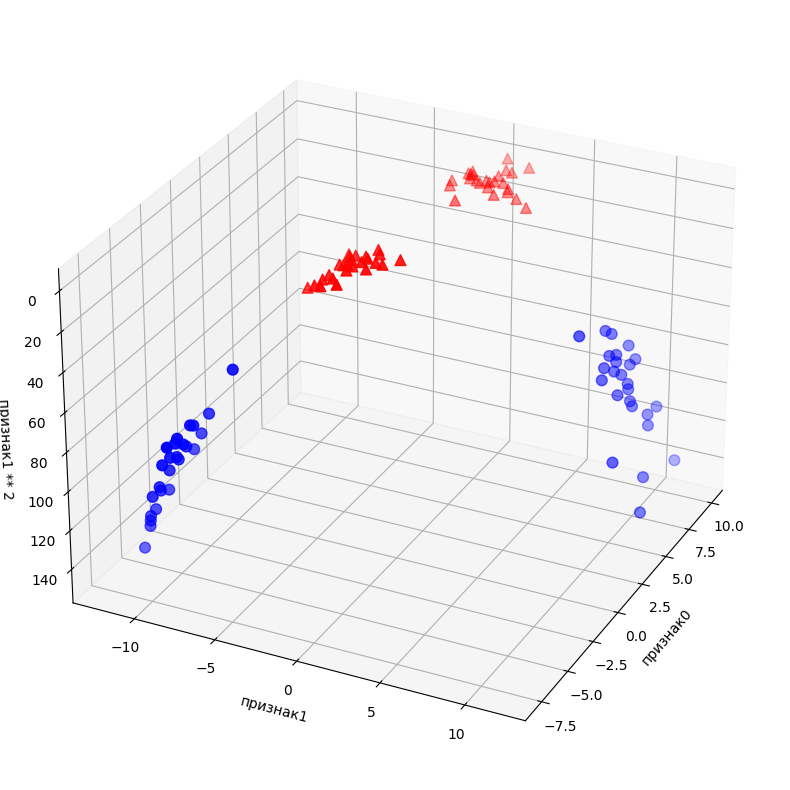

In [ ]:
X_new = np.hstack([X, X[:, 1:] ** 2]) 
 
from mpl_toolkits.mplot3d import Axes3D, axes3d 
figure = plt.figure(figsize=(10, 10)) 
# визуализируем в 3D 
ax = plt.axes(projection='3d')
ax.view_init(elev=-152, azim=-26)
# сначала размещаем на графике все точки с y == 0, затем с y == 1 
mask = y == 0 
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60) 
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60) 
ax.set_xlabel("признак0") 
ax.set_ylabel("признак1") 
ax.set_zlabel("признак1 ** 2");
# Расширение набора данных за счет добавления третьего признака, полученного на основе признака 1

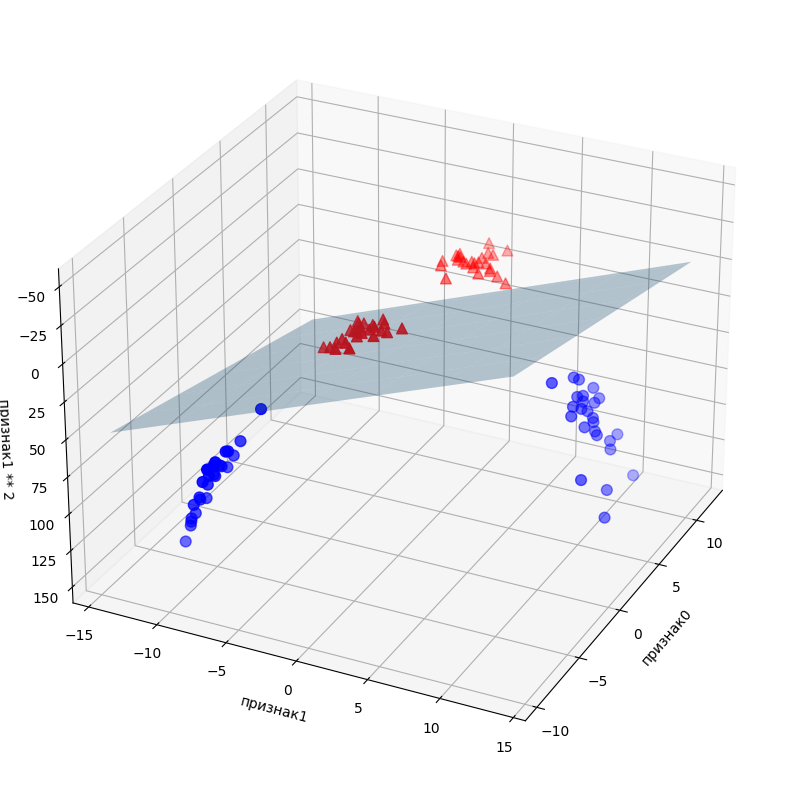

In [ ]:
linear_svm_3d = LinearSVC().fit(X_new, y) 
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_ 
 
# показать границу принятия решений линейной модели 
figure = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.view_init(elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50) 
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50) 
 
XX, YY = np.meshgrid(xx, yy) 
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2] 
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3) 
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', 
           cmap=mglearn.cm2, s=60) 
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60) 
 
ax.set_xlabel("признак0") 
ax.set_ylabel("признак1") 
ax.set_zlabel("признак1 ** 2");
# Граница принятия решений, найденная линейным SVM для расширенного трехмерного набора данных

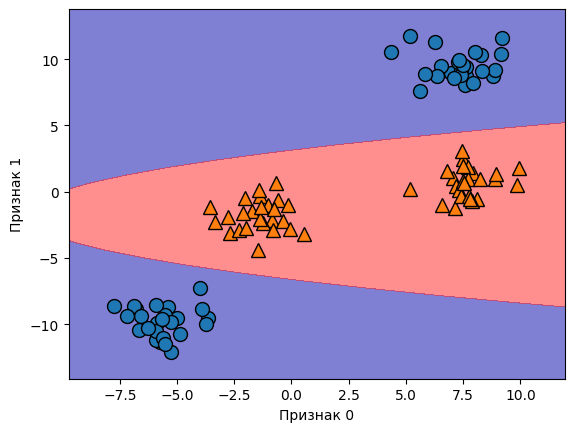

In [ ]:
ZZ = YY ** 2 
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]) 
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
             cmap=mglearn.cm2, alpha=0.5) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Признак 0") 
plt.ylabel("Признак 1");
# Граница принятия решений как функция от двух исходных признаков

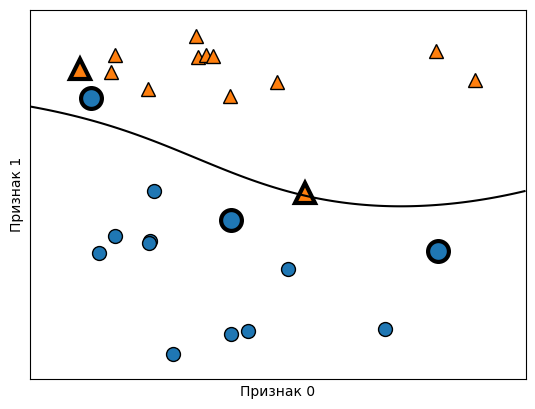

In [ ]:
from sklearn.svm import SVC 
X, y = mglearn.tools.make_handcrafted_dataset() 
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y) 
mglearn.plots.plot_2d_separator(svm, X, eps=.5) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
# размещаем на графике опорные векторы 
sv = svm.support_vectors_ 
# метки классов опорных векторов определяются знаком дуальных коэффициентов 
sv_labels = svm.dual_coef_.ravel() > 0 
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3) 
plt.xlabel("Признак 0") 
plt.ylabel("Признак 1");
# Граница принятия решений и опорные векторы, найденные SVM с помощью ядра RBF

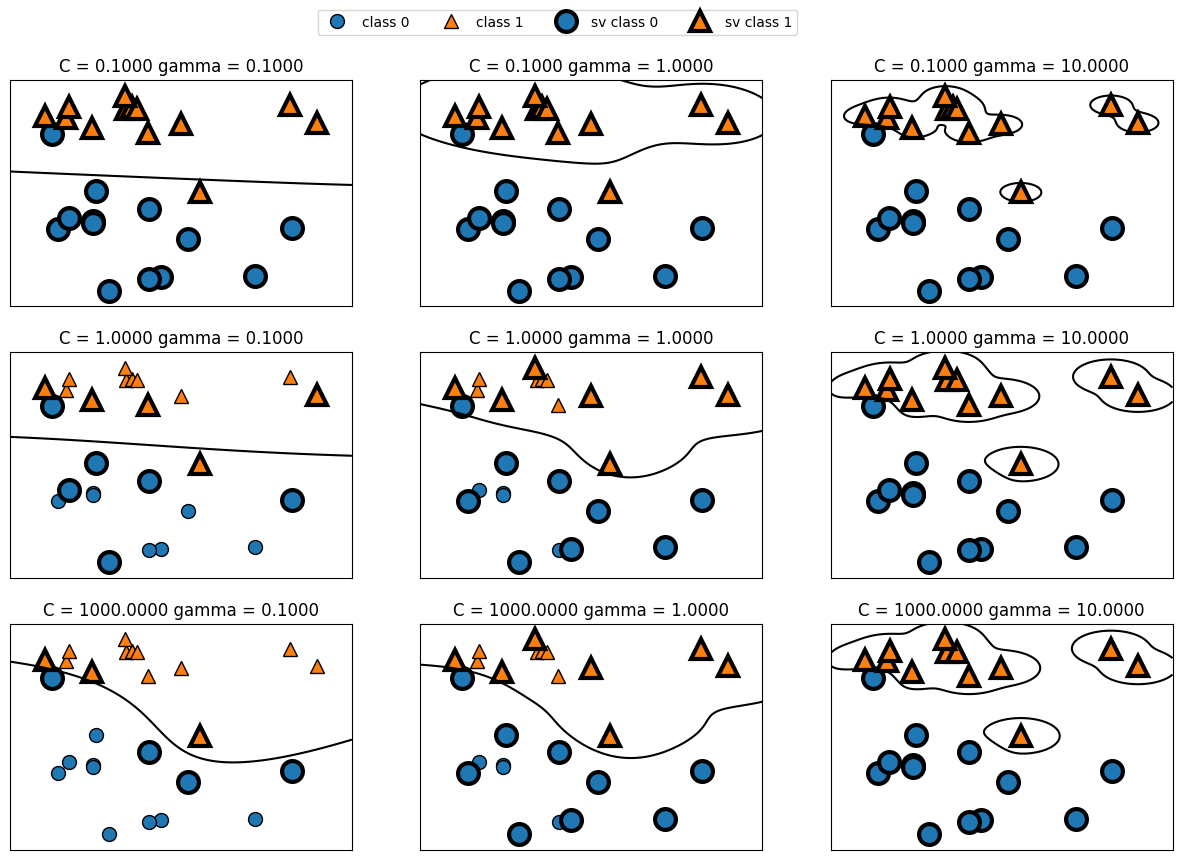

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10)) 
 
for ax, C in zip(axes, [-1, 0, 3]): 
    for a, gamma in zip(ax, range(-1, 2)): 
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a) 
 
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2));
# Границы принятия решений и опорные векторы для различных значений параметров C и gamma

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( 
    iris.data, iris.target, random_state=0) 
 
svc = SVC() 
svc.fit(X_train, y_train) 
 
print("Правильность на обучающем наборе: {:.2f}".format(svc.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(svc.score(X_test, y_test)))

Правильность на обучающем наборе: 0.96
Правильность на тестовом наборе: 0.97


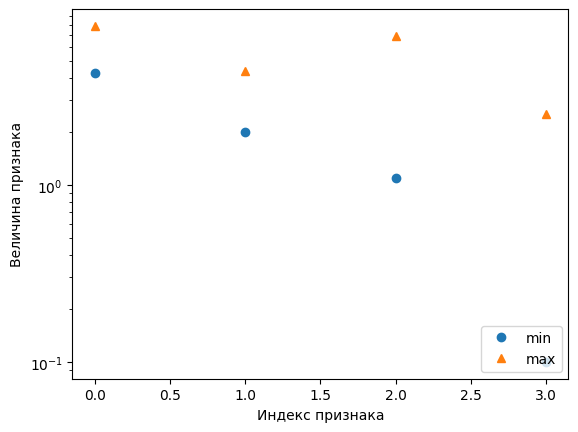

In [ ]:
plt.plot(X_train.min(axis=0), 'o', label="min") 
plt.plot(X_train.max(axis=0), '^', label="max") 
plt.legend(loc=4) 
plt.xlabel("Индекс признака") 
plt.ylabel("Величина признака") 
plt.yscale("log")
# Диапазоны значений признаков для набора данных Breast Cancer (обратите внимание, что ось у имеет логарифмическую шкалу) 

In [ ]:
# вычисляем минимальное значение для каждого признака обучающего набора 
min_on_training = X_train.min(axis=0) 
# вычисляем ширину диапазона для каждого признака (max - min) обучающего набора 
range_on_training = (X_train - min_on_training).max(axis=0) 
 
# вычитаем минимальное значение и затем делим на ширину диапазона 
# min=0 и max=1 для каждого признака 
X_train_scaled = (X_train - min_on_training) / range_on_training 
print("Минимальное значение для каждого признака\n{}".format(X_train_scaled.min(axis=0))) 
print("Максимальное значение для каждого признака\n {}".format(X_train_scaled.max(axis=0)))

Минимальное значение для каждого признака
[0. 0. 0. 0.]
Максимальное значение для каждого признака
 [1. 1. 1. 1.]


In [ ]:
# используем ТО ЖЕ САМОЕ преобразование для тестового набора, 
# используя минимум и ширину диапазона из обучающего набора
X_test_scaled = (X_test - min_on_training) / range_on_training

svc.fit(X_train_scaled, y_train) 
 
print("Правильность на обучающем наборе: {:.3f}".format(svc.score(X_train_scaled, y_train))) 
print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.964
Правильность на тестовом наборе: 0.974


In [ ]:
kernel = ['linear', 'poly', 'rbf']

In [ ]:
from statistics import mean

scores1 = []
scores2 = []
scores3 = []
for i in range(1, 1000):
  svc = SVC(kernel=kernel[0], C=i, gamma=0.01) 
  svc.fit(X_train_scaled, y_train)
  scores1.append(svc.score(X_test_scaled, y_test))
  svc = SVC(kernel=kernel[1], C=i, gamma=0.01)
  svc.fit(X_train_scaled, y_train)
  scores2.append(svc.score(X_test_scaled, y_test))
  svc = SVC(kernel=kernel[2], C=i, gamma=0.01)
  svc.fit(X_train_scaled, y_train)
  scores3.append(svc.score(X_test_scaled, y_test))


scores = [mean(scores1), mean(scores2), mean(scores3)]
print("Правильность на тестовом наборе {}: {:.3f}".format(kernel[0], scores[0]))
print("Правильность на тестовом наборе {}: {:.3f}".format(kernel[1], scores[1]))
print("Правильность на тестовом наборе {}: {:.3f}".format(kernel[2], scores[2]))

Правильность на тестовом наборе linear: 0.973
Правильность на тестовом наборе poly: 0.237
Правильность на тестовом наборе rbf: 0.970


In [ ]:
scores1 = []
for i in range(1, 1000):
  svc = SVC(kernel=kernel[0], C=i, gamma=0.01) 
  svc.fit(X_train_scaled, y_train)
  scores1.append(svc.score(X_test_scaled, y_test))

print(max(scores1))
print(scores1)

0.9736842105263158
[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 

In [ ]:
scores1 = []
for i in range(50, 550, 1):
  svc = SVC(kernel=kernel[0], C=123, gamma=i/100) 
  svc.fit(X_train_scaled, y_train)
  scores1.append(svc.score(X_test_scaled, y_test))

print(max(scores1))
print(scores1)

0.9736842105263158
[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( 
    iris.data, iris.target, random_state=0) 
 
mlp = MLPClassifier() 
mlp.fit(X_train, y_train) 
 
print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(mlp.score(X_test, y_test)))

Правильность на обучающем наборе: 0.97
Правильность на тестовом наборе: 0.95


228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477


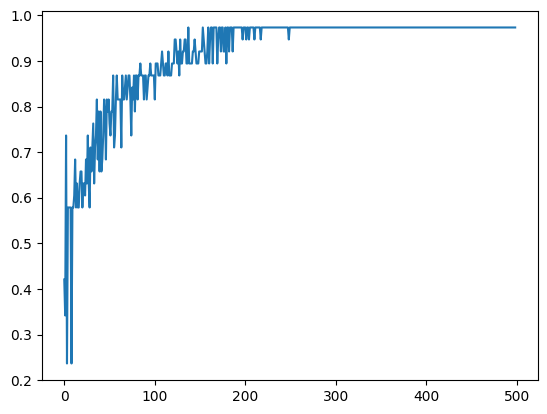

In [ ]:
from statistics import mean

scores1 = []
for i in range(1, 500):
  print(i)
  mlp = MLPClassifier(hidden_layer_sizes=(i), alpha=0.001, activation='relu'
  , learning_rate='constant', learning_rate_init=0.001, ) 
  mlp.fit(X_train_scaled, y_train)
  scores1.append(mlp.score(X_test_scaled, y_test))


plt.plot(scores1)


In [ ]:
scores2 = []
for i in range(1, 500):
  print(i)
  mlp = MLPClassifier(hidden_layer_sizes=(200), alpha=i/1000, activation='relu'
  , learning_rate='constant', learning_rate_init=0.001, ) 
  mlp.fit(X_train_scaled, y_train)
  scores2.append(mlp.score(X_test_scaled, y_test))


plt.plot(scores2)